<h1 style="background: linear-gradient(to right, #98FF98, #20B2AA);
;
;
;
;
; color:white; text-align:center; 
           padding: 12px; border-radius: 15px; font-weight: bold; 
           font-family: 'Georgia', serif; 
           text-shadow: 3px 8px 5px rgba(128, 0, 128, 0.5); /* dark green shadow */
           box-shadow: 4px 6px 10px rgba(200, 200, 200, 0.5); /* Light green shadow */
">
  HEALTH OF EYE
</h1>

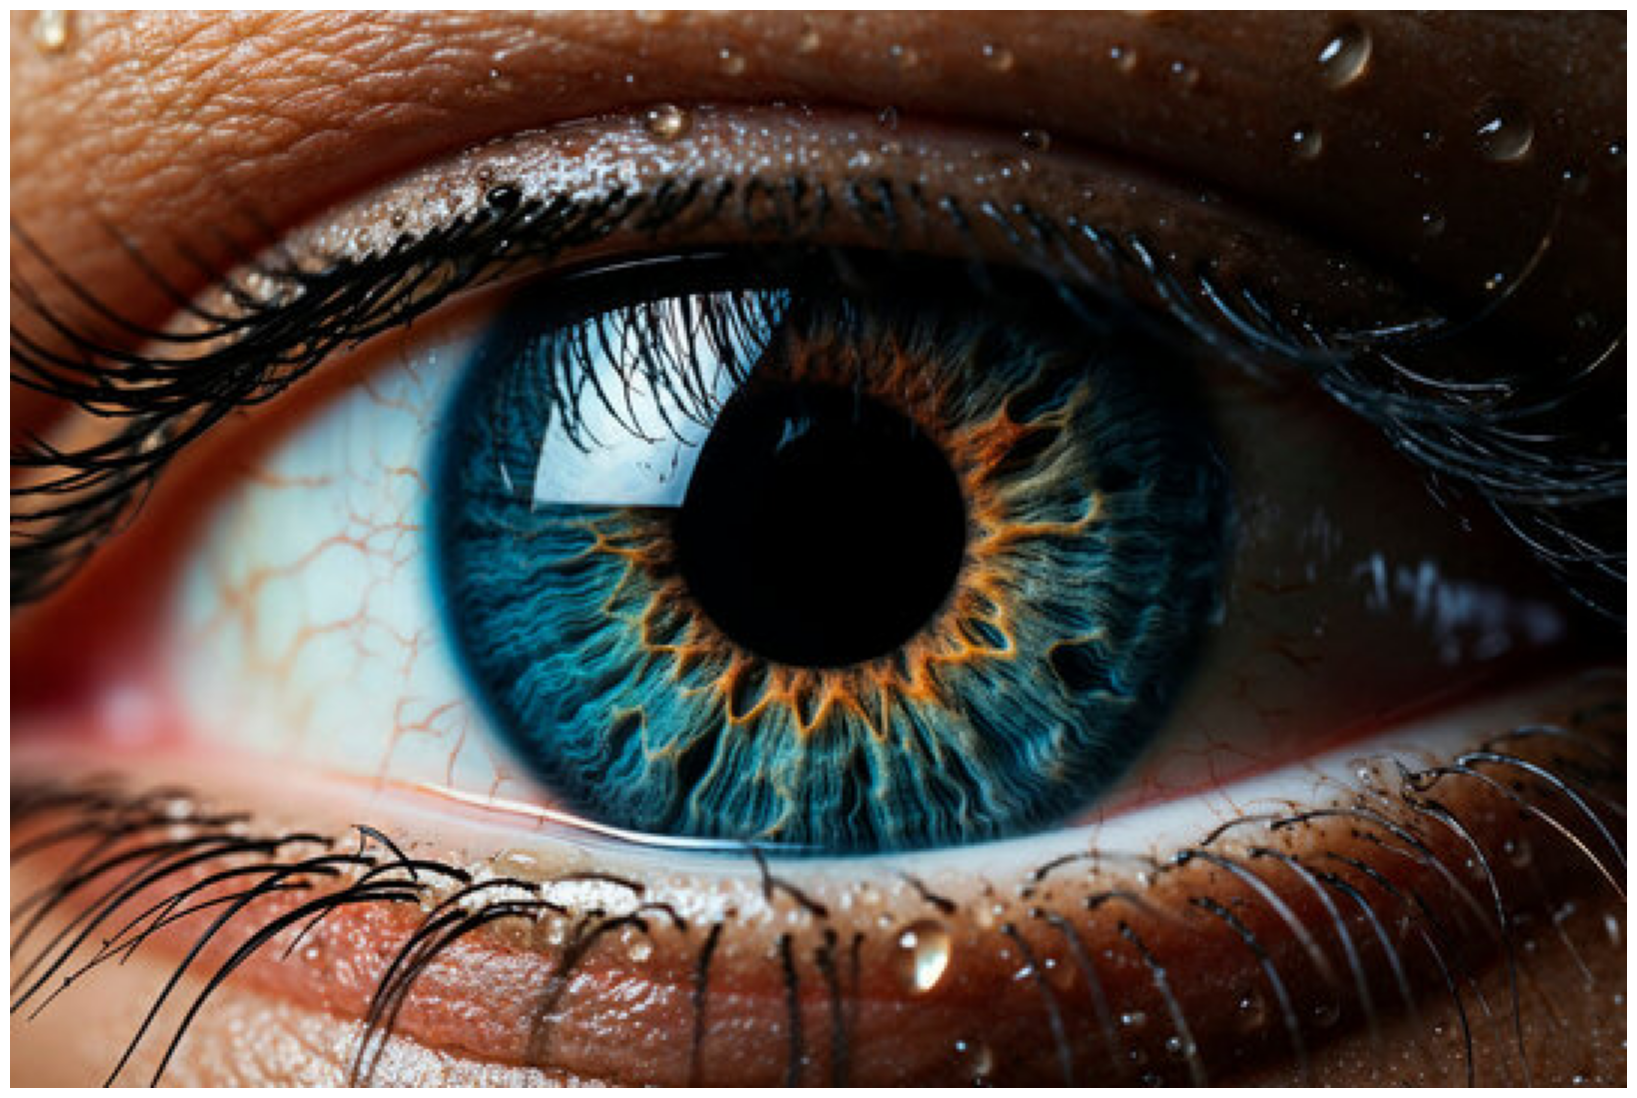

In [1]:

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread(r"C:\Users\Shuhaib\Downloads\360_F_709329512_OZ114m1TpMPXdNa3x1JP75KJ9bPbRnc6.jpg")

plt.figure(figsize=(22, 14))   # Bigger = larger image
plt.imshow(img)
plt.axis('off')
plt.show()

<h1 style="background: linear-gradient(to right, #98FF98, #20B2AA);
;
;
;
;
; color:bLACK; text-align:center; 
           padding: 12px; border-radius: 15px; font-weight: bold; 
           font-family: 'Georgia', serif; 
           text-shadow: 3px 8px 5px rgba(128, 0, 128, 0.5); /* Purple shadow */
           box-shadow: 4px 6px 10px rgba(200, 200, 200, 0.5); /* Light gray shadow */
">
  IMPORT LIBRAIES
</h1>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,OrdinalEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression




In [3]:
ey=pd.read_csv(r"C:\Users\Shuhaib\Downloads\patient_data (1).csv")
ey

,name,age,has_eye_disease,has_diabetic_retinopathy,sugar_percentage,glucose_percentage,cholesterol_percentage,obesity_percentage,blood_pressure,heart_rate
0,Patient 1,39,False,False,5.70,147.48,164.45,32.94,122/63,94
1,Patient 2,67,True,False,8.72,91.52,235.62,39.58,92/80,68
2,Patient 3,44,True,False,13.83,160.17,299.13,38.45,140/60,67
3,Patient 4,46,True,True,9.48,106.84,236.75,29.10,132/83,82
4,Patient 5,39,False,False,5.60,158.65,182.11,16.25,128/72,63
...,...,...,...,...,...,...,...,...,...,...
19995,Patient 19996,45,False,False,7.78,157.15,213.97,27.25,123/65,65
19996,Patient 19997,59,False,False,9.95,116.91,165.76,33.10,99/61,95
19997,Patient 19998,80,False,False,5.59,147.15,248.27,15.36,122/76,60
19998,Patient 19999,79,True,False,7.51,150.61,206.42,39.94,120/62,66


In [4]:
ey.columns

Index(['name', 'age', 'has_eye_disease', 'has_diabetic_retinopathy',
       'sugar_percentage', 'glucose_percentage', 'cholesterol_percentage',
       'obesity_percentage', 'blood_pressure', 'heart_rate'],
      dtype='object')

In [5]:

ey.describe()

,age,sugar_percentage,glucose_percentage,cholesterol_percentage,obesity_percentage,heart_rate
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,54.924350,9.481480,135.056622,199.907359,27.492396,79.915700
std,14.624655,3.178785,37.613572,58.094403,7.218316,11.777238
min,30.000000,4.000000,70.010000,100.020000,15.000000,60.000000
25%,42.000000,6.720000,102.520000,149.207500,21.230000,70.000000
50%,55.000000,9.460000,135.280000,199.760000,27.460000,80.000000
75%,67.000000,12.230000,167.705000,250.202500,33.770000,90.000000
max,80.000000,15.000000,200.000000,300.000000,40.000000,100.000000


In [6]:
ey.shape

(20000, 10)

In [7]:
ey.isnull().sum()

name                        0
age                         0
has_eye_disease             0
has_diabetic_retinopathy    0
sugar_percentage            0
glucose_percentage          0
cholesterol_percentage      0
obesity_percentage          0
blood_pressure              0
heart_rate                  0
dtype: int64

In [8]:
for x in ey:
    print([x])
    print(ey[x].unique())

['name']
['Patient 1' 'Patient 2' 'Patient 3' ... 'Patient 19998' 'Patient 19999'
 'Patient 20000']
['age']
[39 67 44 46 51 72 69 80 59 41 34 47 35 53 76 62 66 49 63 38 79 48 65 57
 50 56 61 73 43 33 70 58 77 54 75 55 64 30 74 36 52 31 42 60 32 71 45 78
 37 68 40]
['has_eye_disease']
[False  True]
['has_diabetic_retinopathy']
[False  True]
['sugar_percentage']
[ 5.7   8.72 13.83 ...  5.08  7.23  4.  ]
['glucose_percentage']
[147.48  91.52 160.17 ... 153.51 188.93 177.04]
['cholesterol_percentage']
[164.45 235.62 299.13 ... 157.7  248.27 206.42]
['obesity_percentage']
[32.94 39.58 38.45 ... 25.88 30.34 26.71]
['blood_pressure']
['122/63' '92/80' '140/60' ... '106/69' '107/89' '125/61']
['heart_rate']
[ 94  68  67  82  63  75  89  62  77  79  85  95  71  97 100  88  92  66
  99  83  96  60  80  86  78  74  70  61  64  69  87  91  76  65  84  72
  81  73  93  98  90]


In [9]:
ey.dtypes

name                         object
age                           int64
has_eye_disease                bool
has_diabetic_retinopathy       bool
sugar_percentage            float64
glucose_percentage          float64
cholesterol_percentage      float64
obesity_percentage          float64
blood_pressure               object
heart_rate                    int64
dtype: object

In [10]:
colnum=ey.select_dtypes(include='number')

<h2 style="background-color:green; color:white; text-align:left;padding: 12px; boarder-radius: 15xp; font-wight: bold;"> UNIVARIATE
</h2>

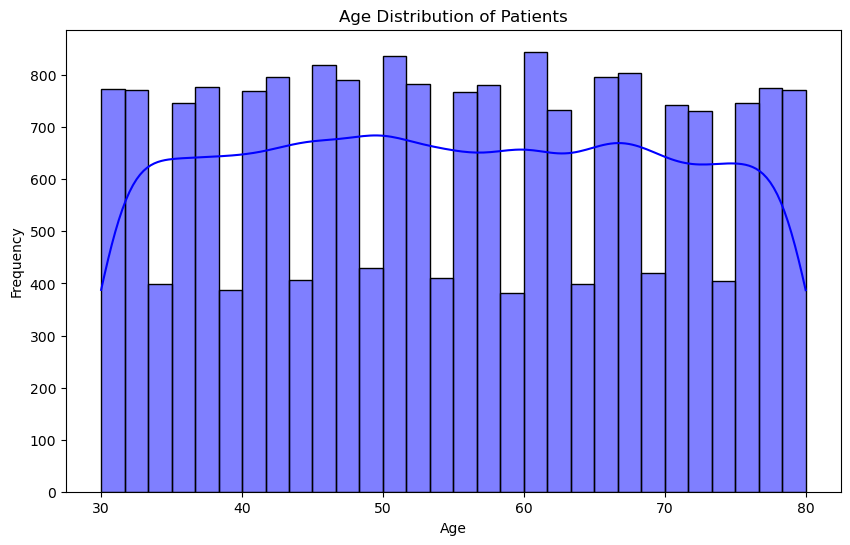

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(ey['age'], kde=True, color='blue', bins=30)
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<h2 style="background-color:green; color:white; text-align:left;padding: 12px; boarder-radius: 15xp; font-wight: bold;"> BIVARIATE
</h2>

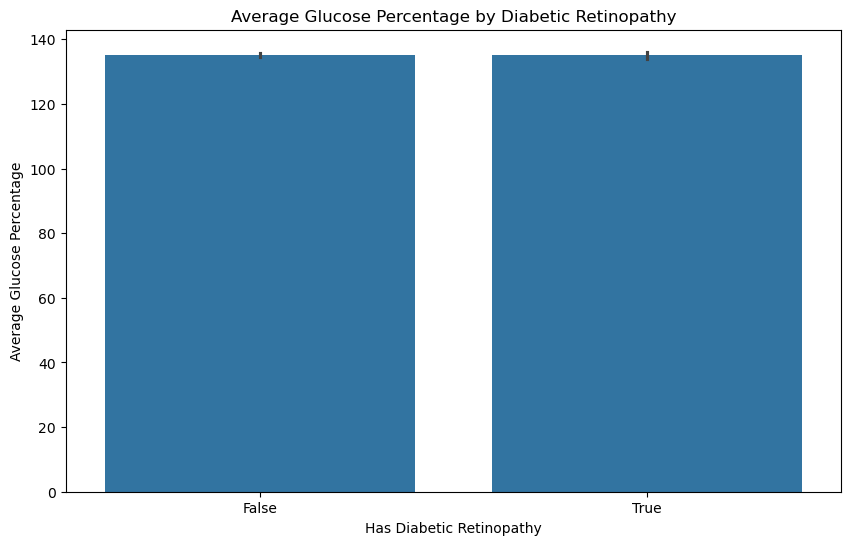

In [12]:
# Bar plot: Average Glucose Percentage by Diabetic Retinopathy Status
plt.figure(figsize=(10, 6))
sns.barplot(data=ey, x='has_diabetic_retinopathy', y='glucose_percentage')
plt.title('Average Glucose Percentage by Diabetic Retinopathy')
plt.xlabel('Has Diabetic Retinopathy')
plt.ylabel('Average Glucose Percentage')
plt.show()

<h2 style="background-color:GREEN; color:white; text-align:left;padding: 12px; boarder-radius: 15xp; font-wight: bold;"> MULTIVARIATE
</h2>

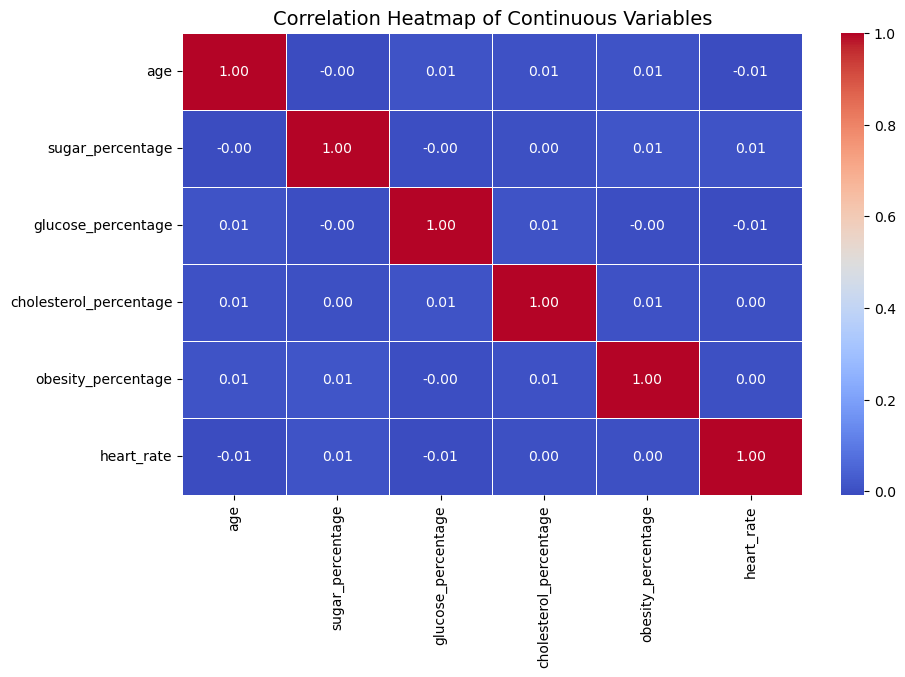

In [13]:

continuous_columns = ['age', 'sugar_percentage', 'glucose_percentage', 
                      'cholesterol_percentage', 'obesity_percentage', 'heart_rate']
correlation_matrix = ey[continuous_columns].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Continuous Variables', fontsize=14)
plt.show()


<h2 style="background-color:green; color:white; text-align:left;padding: 12px; boarder-radius: 15xp; font-wight: bold;"> GROUPBY
</h2>

In [14]:
ey.groupby("has_eye_disease")["sugar_percentage"].mean()

has_eye_disease
False    9.478912
True     9.484117
Name: sugar_percentage, dtype: float64

In [15]:
ey.columns

Index(['name', 'age', 'has_eye_disease', 'has_diabetic_retinopathy',
       'sugar_percentage', 'glucose_percentage', 'cholesterol_percentage',
       'obesity_percentage', 'blood_pressure', 'heart_rate'],
      dtype='object')

In [16]:
ey = ey.drop(columns=['name', 'blood_pressure'])
ey

,age,has_eye_disease,has_diabetic_retinopathy,sugar_percentage,glucose_percentage,cholesterol_percentage,obesity_percentage,heart_rate
0,39,False,False,5.70,147.48,164.45,32.94,94
1,67,True,False,8.72,91.52,235.62,39.58,68
2,44,True,False,13.83,160.17,299.13,38.45,67
3,46,True,True,9.48,106.84,236.75,29.10,82
4,39,False,False,5.60,158.65,182.11,16.25,63
...,...,...,...,...,...,...,...,...
19995,45,False,False,7.78,157.15,213.97,27.25,65
19996,59,False,False,9.95,116.91,165.76,33.10,95
19997,80,False,False,5.59,147.15,248.27,15.36,60
19998,79,True,False,7.51,150.61,206.42,39.94,66


<h2 style="background-color:GREEN; color:white; text-align:left;padding: 12px; boarder-radius: 15xp; font-wight: bold;"> ENCODING
</h2>

In [17]:

label_encoder = LabelEncoder()
ey['has_eye_disease'] = label_encoder.fit_transform(ey['has_eye_disease'])
ey['has_diabetic_retinopathy'] = label_encoder.fit_transform(ey['has_diabetic_retinopathy'])

In [18]:
ey

,age,has_eye_disease,has_diabetic_retinopathy,sugar_percentage,glucose_percentage,cholesterol_percentage,obesity_percentage,heart_rate
0,39,0,0,5.70,147.48,164.45,32.94,94
1,67,1,0,8.72,91.52,235.62,39.58,68
2,44,1,0,13.83,160.17,299.13,38.45,67
3,46,1,1,9.48,106.84,236.75,29.10,82
4,39,0,0,5.60,158.65,182.11,16.25,63
...,...,...,...,...,...,...,...,...
19995,45,0,0,7.78,157.15,213.97,27.25,65
19996,59,0,0,9.95,116.91,165.76,33.10,95
19997,80,0,0,5.59,147.15,248.27,15.36,60
19998,79,1,0,7.51,150.61,206.42,39.94,66


In [19]:
df=ey.copy()
df

,age,has_eye_disease,has_diabetic_retinopathy,sugar_percentage,glucose_percentage,cholesterol_percentage,obesity_percentage,heart_rate
0,39,0,0,5.70,147.48,164.45,32.94,94
1,67,1,0,8.72,91.52,235.62,39.58,68
2,44,1,0,13.83,160.17,299.13,38.45,67
3,46,1,1,9.48,106.84,236.75,29.10,82
4,39,0,0,5.60,158.65,182.11,16.25,63
...,...,...,...,...,...,...,...,...
19995,45,0,0,7.78,157.15,213.97,27.25,65
19996,59,0,0,9.95,116.91,165.76,33.10,95
19997,80,0,0,5.59,147.15,248.27,15.36,60
19998,79,1,0,7.51,150.61,206.42,39.94,66


In [20]:
df=df.drop(["has_eye_disease","has_diabetic_retinopathy"],axis=1)
df

,age,sugar_percentage,glucose_percentage,cholesterol_percentage,obesity_percentage,heart_rate
0,39,5.70,147.48,164.45,32.94,94
1,67,8.72,91.52,235.62,39.58,68
2,44,13.83,160.17,299.13,38.45,67
3,46,9.48,106.84,236.75,29.10,82
4,39,5.60,158.65,182.11,16.25,63
...,...,...,...,...,...,...
19995,45,7.78,157.15,213.97,27.25,65
19996,59,9.95,116.91,165.76,33.10,95
19997,80,5.59,147.15,248.27,15.36,60
19998,79,7.51,150.61,206.42,39.94,66


<h2 style="background-color:GREEN; color:white; text-align:left;padding: 12px; boarder-radius: 15xp; font-wight: bold;"> SCALING
</h2>

In [21]:

from sklearn.preprocessing import MinMaxScaler

In [22]:
standard_scaler = MinMaxScaler()

In [23]:
df.columns

Index(['age', 'sugar_percentage', 'glucose_percentage',
       'cholesterol_percentage', 'obesity_percentage', 'heart_rate'],
      dtype='object')

In [24]:
scaler=standard_scaler.fit_transform(df)
df=pd.DataFrame(scaler,columns=df.columns)

In [25]:
df.head()

,age,sugar_percentage,glucose_percentage,cholesterol_percentage,obesity_percentage,heart_rate
0,0.18,0.154545,0.595969,0.322182,0.7176,0.850
1,0.74,0.429091,0.165474,0.678068,0.9832,0.200
2,0.28,0.893636,0.693592,0.995650,0.9380,0.175
3,0.32,0.498182,0.283329,0.683718,0.5640,0.550
4,0.18,0.145455,0.681899,0.410491,0.0500,0.075


In [26]:
missing_cols = ey.columns.difference(df.columns)
new_df = pd.concat([df, ey[missing_cols]], axis=1)


In [27]:
new_df

,age,sugar_percentage,glucose_percentage,cholesterol_percentage,obesity_percentage,heart_rate,has_diabetic_retinopathy,has_eye_disease
0,0.18,0.154545,0.595969,0.322182,0.7176,0.850,0,0
1,0.74,0.429091,0.165474,0.678068,0.9832,0.200,0,1
2,0.28,0.893636,0.693592,0.995650,0.9380,0.175,0,1
3,0.32,0.498182,0.283329,0.683718,0.5640,0.550,1,1
4,0.18,0.145455,0.681899,0.410491,0.0500,0.075,0,0
...,...,...,...,...,...,...,...,...
19995,0.30,0.343636,0.670359,0.569807,0.4900,0.125,0,0
19996,0.58,0.540909,0.360797,0.328733,0.7240,0.875,0,0
19997,1.00,0.144545,0.593430,0.741324,0.0144,0.000,0,0
19998,0.98,0.319091,0.620048,0.532053,0.9976,0.150,0,1


In [28]:
x=new_df.drop('has_eye_disease',axis=1)
x

,age,sugar_percentage,glucose_percentage,cholesterol_percentage,obesity_percentage,heart_rate,has_diabetic_retinopathy
0,0.18,0.154545,0.595969,0.322182,0.7176,0.850,0
1,0.74,0.429091,0.165474,0.678068,0.9832,0.200,0
2,0.28,0.893636,0.693592,0.995650,0.9380,0.175,0
3,0.32,0.498182,0.283329,0.683718,0.5640,0.550,1
4,0.18,0.145455,0.681899,0.410491,0.0500,0.075,0
...,...,...,...,...,...,...,...
19995,0.30,0.343636,0.670359,0.569807,0.4900,0.125,0
19996,0.58,0.540909,0.360797,0.328733,0.7240,0.875,0
19997,1.00,0.144545,0.593430,0.741324,0.0144,0.000,0
19998,0.98,0.319091,0.620048,0.532053,0.9976,0.150,0


In [29]:
y=new_df["has_eye_disease"]
y

0        0
1        1
2        1
3        1
4        0
        ..
19995    0
19996    0
19997    0
19998    1
19999    1
Name: has_eye_disease, Length: 20000, dtype: int64

<h1 style="background: linear-gradient(to right, #98FF98, #20B2AA);
;
;
;
;
; color:BLACK; text-align:center; 
           padding: 12px; border-radius: 15px; font-weight: bold; 
           font-family: 'Georgia', serif; 
           text-shadow: 3px 8px 5px rgba(128, 0, 128, 0.5); /* Purple shadow */
           box-shadow: 4px 6px 10px rgba(200, 200, 200, 0.5); /* Light gray shadow */
">
  MODEL BUILDING
</h1>

<h2 style="background-color:GREEN; color:white; text-align:left;padding: 12px; boarder-radius: 15xp; font-wight: bold;"> RANDOM FOREST
</h2>

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [32]:
model = RandomForestClassifier(n_estimators=200, random_state=42)


In [33]:
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [34]:

bool_cols = ["has_eye_disease", "has_diabetic_retinopathy"]
y_pred = model.predict(x_test)


In [35]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.747


<h2 style="background-color:GREEN; color:white; text-align:left;padding: 12px; boarder-radius: 15xp; font-wight: bold;"> PREDICTION
</h2>

In [36]:
new_data=[[0.18,0.154545,0.595969,0.322182,0.7176,0.850,0]]

In [37]:
predicted=model.predict(new_data)

C:\Users\Shuhaib\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [38]:
predicted

array([0])

<h2 style="background-color:GREEN; color:white; text-align:left;padding: 12px; boarder-radius: 15xp; font-wight: bold;"> DECISION TREE
</h2>

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
from sklearn.metrics import accuracy_score

In [41]:
model3= DecisionTreeClassifier(criterion="gini",random_state=100,max_depth=3,min_samples_leaf=5)

In [42]:
model3=model3.fit(x_train,y_train)

In [43]:
y_pred3=model3.predict(x_test)

In [44]:
accuracy=accuracy_score(y_test,y_pred3)

In [45]:
accuracy

0.75225

<h2 style="background-color:GREEN; color:white; text-align:left;padding: 12px; boarder-radius: 15xp; font-wight: bold;"> SUPPORT VECTOR MACHINE
               
</h2>

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc=SVC(kernel="linear")

In [ ]:

svc=svc.fit(x_train,y_train)

In [ ]:
y_svrl=svc.predict(x_test)

In [ ]:
r2_svrl=accuracy_score(y_test,y_svrl)

In [ ]:
r2_svrl

In [52]:
svr_rbf=SVC(kernel="rbf")

In [53]:
svr_rbf=svr_rbf.fit(x_train,y_train)

In [54]:
y_svrbf=svr_rbf.predict(x_test)

In [55]:
r2_svrbf=accuracy_score(y_test,y_svrbf)

In [56]:
r2_svrbf

0.75225

<h2 style="background-color:GREEN; color:white; text-align:left;padding: 12px; boarder-radius: 15xp; font-wight: bold;"> KNN
               
</h2>

In [57]:
metric_k=[]
neighbors=np.arange(3,15)

In [58]:
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    classifier.fit(x_train,y_train)
    y_prediction=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_prediction)
    metric_k.append(acc)

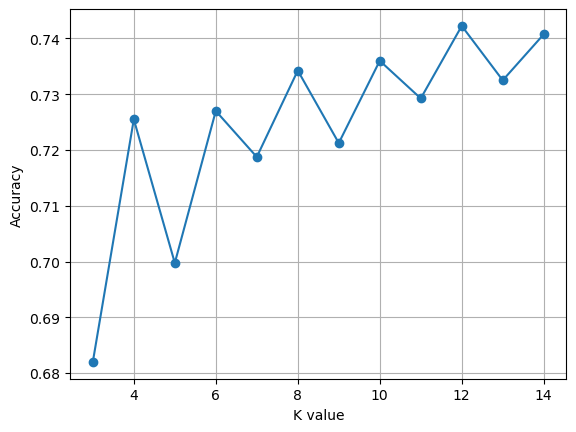

In [59]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.grid()
plt.show()      

In [60]:
classifier=KNeighborsClassifier(n_neighbors=12,metric='euclidean')
knn=classifier.fit(x_train,y_train)
y_prediction=classifier.predict(x_test)

In [61]:
KNN_acc=accuracy_score(y_test,y_prediction)
KNN_acc

0.74225

<h2 style="background-color:GREEN; color:white; text-align:left;padding: 12px; boarder-radius: 15xp; font-wight: bold;"> XGBOOST
               
</h2>

In [62]:
from xgboost import XGBClassifier

In [63]:
model_xgb=XGBClassifier()

In [64]:
model_xgb=model_xgb.fit(x_train,y_train)

In [65]:
y_xgb=model_xgb.predict(x_test)

In [66]:
acc_xgb=accuracy_score(y_test,y_xgb)
acc_xgb

0.71775

<h2 style="background-color:GREEN; color:white; text-align:left;padding: 12px; boarder-radius: 15xp; font-wight: bold;"> CATBOOST
               
</h2>

In [67]:
from catboost import CatBoostClassifier

In [68]:
model_cat=CatBoostClassifier(verbose=0)

In [69]:
model_cat=model_cat.fit(x_train,y_train)

In [70]:
y_cat=model_cat.predict(x_test)

In [71]:
accu_cat=accuracy_score(y_test,y_cat)
accu_cat

0.7425

<h2 style="background-color:GREEN; color:white; text-align:left;padding: 12px; boarder-radius: 15xp; font-wight: bold;"> LIGHTGBM
               
</h2>

In [72]:
import lightgbm as lgb
model=lgb.LGBMClassifier()

In [73]:
model=model.fit(x_train,y_train)

C:\Users\Shuhaib\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Shuhaib\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\Shuhaib\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Shuhaib\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^

[LightGBM] [Info] Number of positive: 7881, number of negative: 8119
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001896 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1114
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.492563 -> initscore=-0.029752
[LightGBM] [Info] Start training from score -0.029752


In [74]:
y_model=model.predict(x_test)

In [75]:
accu_model=accuracy_score(y_test,y_model)

In [76]:
accu_model

0.74475

<h2 style="background-color:GREEN; color:white; text-align:left;padding: 12px; boarder-radius: 15xp; font-wight: bold;"> Tabulate
</h2>

In [77]:
from tabulate import tabulate
table=[["Model","Accuracy"],["Logistic Classifier()",accuracy],
       ["Random Forest",accuracy],["Decision Tree",accuracy],
       ["SVC[linear]",r2_svrl],["SVC[rbf]",r2_svrl],
       ["KNN",KNN_acc],["XG boost",acc_xgb],
       ["Cat boost",accu_cat],["LIGHT GBM",accu_model]]
print(tabulate(table,headers="firstrow",tablefmt="fancy_grid"))


╒═══════════════════════╤════════════╕
│ Model                 │   Accuracy │
╞═══════════════════════╪════════════╡
│ Logistic Classifier() │    0.75225 │
├───────────────────────┼────────────┤
│ Random Forest         │    0.75225 │
├───────────────────────┼────────────┤
│ Decision Tree         │    0.75225 │
├───────────────────────┼────────────┤
│ SVC[linear]           │    0.75225 │
├───────────────────────┼────────────┤
│ SVC[rbf]              │    0.75225 │
├───────────────────────┼────────────┤
│ KNN                   │    0.74225 │
├───────────────────────┼────────────┤
│ XG boost              │    0.71775 │
├───────────────────────┼────────────┤
│ Cat boost             │    0.7425  │
├───────────────────────┼────────────┤
│ LIGHT GBM             │    0.74475 │
╘═══════════════════════╧════════════╛


<h1 style="background: linear-gradient(to right, #98FF98, #20B2AA);
;
;
;
;
; color:BLACK; text-align:center; 
           padding: 12px; border-radius: 15px; font-weight: bold; 
           font-family: 'Georgia', serif; 
           text-shadow: 3px 8px 5px rgba(128, 0, 128, 0.5); /* Purple shadow */
           box-shadow: 4px 6px 10px rgba(200, 200, 200, 0.5); /* Light gray shadow */
">
  HYPERPERAMETER TUNING
</h1>

In [78]:
gh=DecisionTreeClassifier()

In [79]:
from sklearn.model_selection import RandomizedSearchCV 

In [80]:
parameters = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

In [81]:
clf=RandomizedSearchCV(estimator=gh,param_distributions=parameters,cv=2,n_iter=10,n_jobs=-1)
clf.fit(x_train,y_train)

C:\Users\Shuhaib\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
6 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shuhaib\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Shuhaib\anaconda3\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "C:\Users\Shuhaib\anaconda3\Lib\site-packages\sklearn\base.py", line 436, in _validate_param

RandomizedSearchCV(cv=2, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 10, None],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10]})

In [82]:
print("Best Parameters:", clf.best_params_)
print("Best Score (Accuracy):", clf.best_score_)

Best Parameters: {'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 3, 'criterion': 'gini'}
Best Score (Accuracy): 0.7519374999999999


In [83]:
from sklearn.model_selection import GridSearchCV

In [84]:
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

In [ ]:
grid_search = GridSearchCV(estimator=gh,param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(x_train, y_train)


Fitting 5 folds for each of 72 candidates, totalling 360 fits


In [ ]:
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

In [ ]:
from sklearn.metrics import recall_score

In [ ]:
re_s=recall_score(y_test,y_pred,average="weighted")
re_s

from sklearn.metrics import f1_score

In [ ]:
from sklearn.metrics import f1_score




In [ ]:
f1_s=f1_score(y_test,y_pred,average="weighted")
f1_s

<h1 style="background: linear-gradient(to right, #98FF98, #20B2AA);
;
;
;
;
; color:BLACK; text-align:center; 
           padding: 12px; border-radius: 15px; font-weight: bold; 
           font-family: 'Georgia', serif; 
           text-shadow: 3px 8px 5px rgba(128, 0, 128, 0.5); /* Purple shadow */
           box-shadow: 4px 6px 10px rgba(200, 200, 200, 0.5); /* Light gray shadow */
">
  METRICS
</h1>

In [ ]:
from sklearn.metrics import confusion_matrix


In [ ]:
cm= confusion_matrix(y_test,y_pred, labels=[0,1])
print(cm)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

<h2 style="background-color:GREEN; color:white; text-align:left;padding: 12px; boarder-radius: 15xp; font-wight: bold;"> PREDICTION
</h2>

In [ ]:
new_data=[[0.18,0.154545,0.595969,0.322182,0.7176,0.850,0]]
predict=model.predict(new_data)
predict